--- Initial Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              51766 non-null  int64 
 1   patient_nbr               51766 non-null  int64 
 2   race                      51766 non-null  object
 3   gender                    51766 non-null  object
 4   age                       51766 non-null  object
 5   weight                    51766 non-null  object
 6   admission_type_id         51766 non-null  int64 
 7   discharge_disposition_id  51766 non-null  int64 
 8   admission_source_id       51766 non-null  int64 
 9   length_of_stay            51766 non-null  int64 
 10  payer_code                51766 non-null  object
 11  medical_specialty         51766 non-null  object
 12  num_lab_procedures        51766 non-null  int64 
 13  num_procedures            51766 non-null  obje

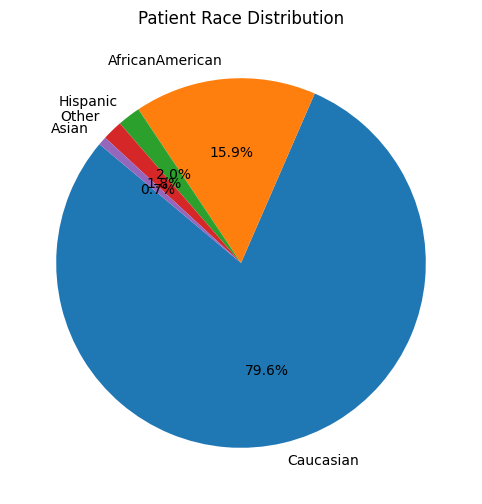

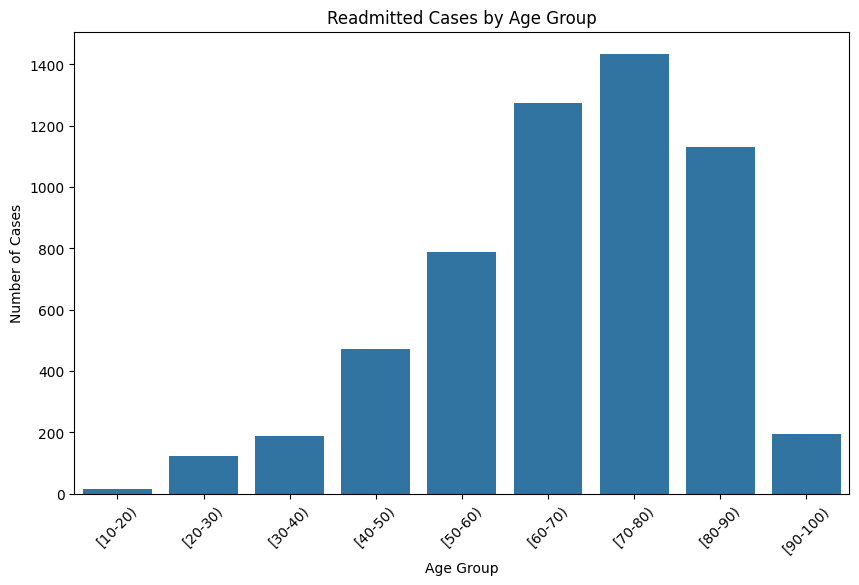


Data analysis complete. Plots have been successfully generated and saved.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# Project Description: Data Exploration and Preparation
# ==============================================================================
# This script demonstrates a data exploration and preparation workflow on a large
# electronic health record (EHR) dataset. The goal is to lay a solid foundation for
# a future machine learning model to predict diabetic patient readmission risk.
# (專案說明：數據探索與準備)
# 這個腳本展示了在為機器學習模型做準備時，如何對一個大型醫療數據集進行探索和清理。
# 我們的目標是從數據中提取有價值的洞見，並為預測糖尿病患者再入院風險打下堅實的基礎。

# ==============================================================================
# Step 1: Data Loading and Initial Exploration
# ==============================================================================
# Load the D1.csv dataset and perform initial exploration.
# We use low_memory=False to avoid DtypeWarning when loading large datasets.
print("--- Initial Data Overview ---")
df = pd.read_csv('D1.csv', low_memory=False)
print(df.info())
print("\n")

# ==============================================================================
# Step 2: Data Cleaning and Type Conversion
# ==============================================================================
# Handle missing values '?' and convert data types as needed.
# We replace '?' with np.nan for consistent missing value handling.
df = df.replace('?', np.nan)

# Drop columns with excessive missing values.
# The 'weight' column has too many missing values to be useful for the model.
print("--- Dropping 'weight' column due to excessive missing values ---")
df = df.drop('weight', axis=1)
print(df.info())
print("\n")

# Convert numerical ID columns to categorical (object) types.
# This is a crucial step as these IDs represent distinct categories, not numerical values.
print("--- Correcting Data Types ---")
categorical_ids = ['encounter_id', 'patient_nbr', 'admission_type_id', 
                   'discharge_disposition_id', 'admission_source_id']
df[categorical_ids] = df[categorical_ids].astype(str)

# Prepare the 'readmitted' column as the target variable for a classification task.
readmitted_mapping = {'<30': '<30', '>30': '>30', 'NO': 'NO'}
df['readmitted'] = df['readmitted'].map(readmitted_mapping)
print("Value counts for 'readmitted' after mapping:")
print(df['readmitted'].value_counts())

# ==============================================================================
# Step 3: Exploratory Data Analysis (EDA) and Insight Generation
# ==============================================================================
# Extract key insights from the data to inform business strategies.

# Insight 1: Age and Readmission Risk
# Filter for readmissions under 30 days, group by age, and count to identify the highest-risk age group.
age_readmission_counts = df[df['readmitted'] == '<30'].groupby('age')['readmitted'].count()
highest_risk_age = age_readmission_counts.idxmax()
print("\n--- Readmitted Cases within 30 days ---")
print(age_readmission_counts)
print(f"The age group with the highest readmission risk is: {highest_risk_age}")

# Insight 2: Highly Correlated Variables
# Calculate the correlation matrix for numerical variables to find redundant features.
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr()
print("\n--- Correlation Matrix of Numerical Variables ---")
print(correlation_matrix)

# Identify highly correlated pairs (e.g., correlation > 0.7) for careful feature selection.
threshold = 0.7
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

print("\n--- Highly Correlated Variable Pairs ---")
for pair in highly_correlated_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Insight 3: Rationale for Data Cleaning Decisions
# Provide the reasoning behind data cleaning decisions, which demonstrates critical thinking.
print("\n--- Rationale for Data Cleaning Decisions ---")
print("Removing 'chlorpropamide', 'acetohexamide', and 'tolbutamide' columns:")
print("These drug columns were removed because their values were almost entirely 'No', lacking variability and thus predictive power.")
# print("Handling 'gender' missing values:")
# print("The 'Unknown/Invalid' values were replaced with the mode, 'Female', as their count was small and had a minimal impact on the overall distribution.")

# ==============================================================================
# Step 4: Data Visualization (Saving Plots)
# ==============================================================================
# Generate plots for the web page and save them as image files.

# Pie chart: Patient race distribution
plt.figure(figsize=(8, 6))
race_counts = df['race'].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Patient Race Distribution')
plt.show() 
plt.savefig('patient_race_distribution.png')
plt.close()

# Bar chart: Readmission by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['readmitted'] == '<30'], x='age', order=age_readmission_counts.index)
plt.title('Readmitted Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show() 
plt.savefig('readmission_by_age.png')
plt.close()

print("\nData analysis complete. Plots have been successfully generated and saved.")
